This project is found in the kaggle competition: https://www.kaggle.com/competitions/spaceship-titanic/overview

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression

### Cleaning the data

In [2]:
train = pd.read_csv('datasets/train.csv')

In [3]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [5]:
train.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

Since there aren't too many null values let's just delete them

In [6]:
train.dropna(inplace=True)
train.isna().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
Transported     0
dtype: int64

In [7]:
train['CryoSleep'] = train['CryoSleep'].map(lambda x: 1 if x else 0)
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,0,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,0,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,0,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,0,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,0,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [8]:
train['VIP'] = train['VIP'].map(lambda x: 1 if x else 0)
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,0,B/0/P,TRAPPIST-1e,39.0,0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,0,F/0/S,TRAPPIST-1e,24.0,0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,0,A/0/S,TRAPPIST-1e,58.0,1,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,0,A/0/S,TRAPPIST-1e,33.0,0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,0,F/1/S,TRAPPIST-1e,16.0,0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [9]:
train['Transported'] = train['Transported'].map(lambda x: 1 if x else 0)
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,0,B/0/P,TRAPPIST-1e,39.0,0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0
1,0002_01,Earth,0,F/0/S,TRAPPIST-1e,24.0,0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1
2,0003_01,Europa,0,A/0/S,TRAPPIST-1e,58.0,1,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0
3,0003_02,Europa,0,A/0/S,TRAPPIST-1e,33.0,0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0
4,0004_01,Earth,0,F/1/S,TRAPPIST-1e,16.0,0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1


### EDA

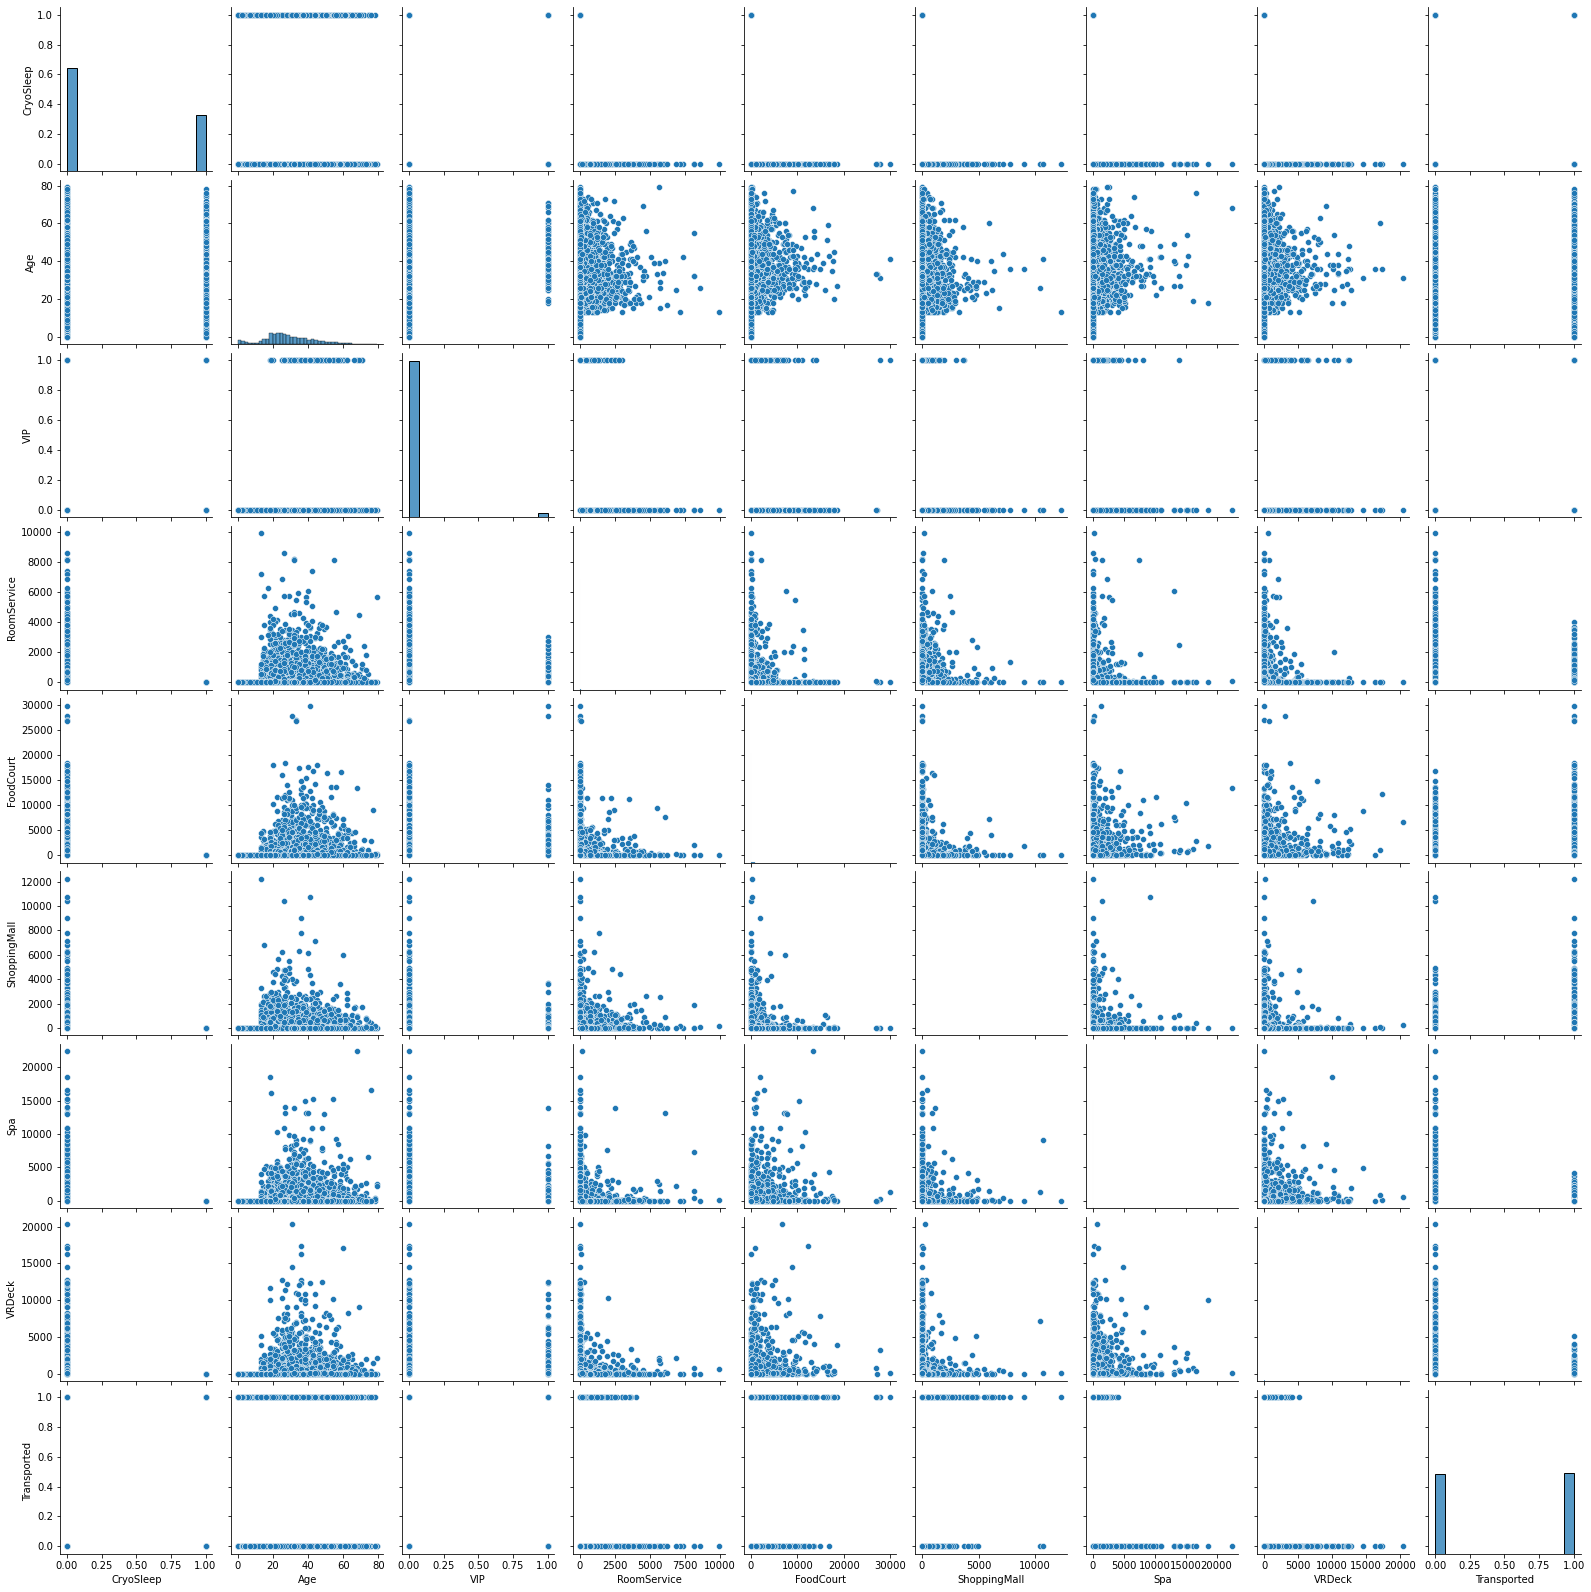

In [10]:
sns.pairplot(train)

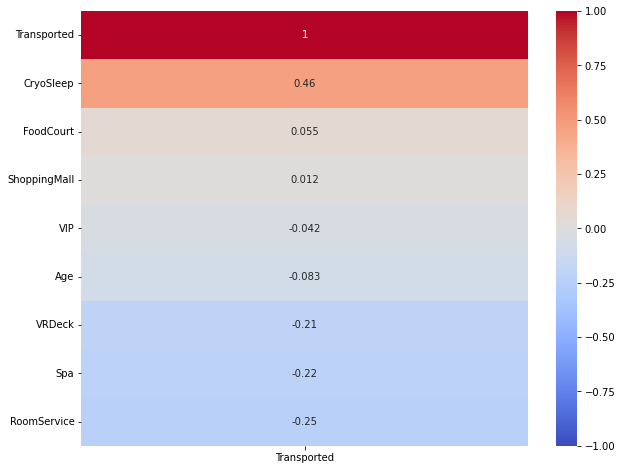

In [11]:
plt.figure(figsize=(10,8))
sns.heatmap(train.corr()[['Transported']].sort_values(by='Transported',ascending=False),
            annot = True,
            vmin = -1,
            vmax = 1,
            cmap = 'coolwarm');
plt.savefig('pics/heatmap.png')

The biggest indicator of weather the passenger was transported, according to our heat map, is if they had elected to be put into suspended animation during the voyage

In [12]:
train['HomePlanet'].unique()

array(['Europa', 'Earth', 'Mars'], dtype=object)

In [13]:
#taken from https://www.geeksforgeeks.org/how-to-print-an-entire-pandas-dataframe-in-python/
# Permanently changes the pandas settings
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

C:\Users\matth\AppData\Local\Temp/ipykernel_37584/2518395933.py:6: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [14]:
train.groupby('HomePlanet').describe().T

HomePlanet                Earth        Europa         Mars
CryoSleep    count  3566.000000  1673.000000   1367.000000
             mean   0.305665     0.432756      0.378932   
             std    0.460753     0.495606      0.485299   
             min    0.000000     0.000000      0.000000   
             25%    0.000000     0.000000      0.000000   
             50%    0.000000     0.000000      0.000000   
             75%    1.000000     1.000000      1.000000   
             max    1.000000     1.000000      1.000000   
Age          count  3566.000000  1673.000000   1367.000000
             mean   26.054683    34.572026     29.351865  
             std    14.350084    12.977934     14.730566  
             min    0.000000     0.000000      0.000000   
             25%    18.000000    26.000000     20.000000  
             50%    24.000000    33.000000     28.000000  
             75%    35.000000    43.000000     38.000000  
             max    78.000000    79.000000     76.000000  
VIP          count  3566.000000  1673.000000   1367.000000
             mean   0.000000     0.065750      0.038040   
             std    0.000000     0.247919      0.191362   
             min    0.000000     0.000000      0.000000   
             25%    0.000000     0.000000      0.000000   
             50%    0.000000     0.000000      0.000000   
             75%    0.000000     0.000000      0.000000   
             max    0.000000     1.000000      1.000000   
RoomService  count  3566.000000  1673.000000   1367.000000
             mean   138.127594   129.102809    559.276518 
             std    390.545886   679.851672    951.292163 
             min    0.000000     0.000000      0.000000   
             25%    0.000000     0.000000      0.000000   
             50%    0.000000     0.000000      32.000000  
             75%    31.000000    0.000000      859.500000 
             max    6256.000000  8586.000000   9920.000000
FoodCourt    count  3566.000000  1673.000000   1367.000000
             mean   136.513741   1558.692767   50.840527  
             std    360.747278   3039.372535   245.077403 
             min    0.000000     0.000000      0.000000   
             25%    0.000000     0.000000      0.000000   
             50%    0.000000     16.000000     0.000000   
             75%    31.000000    1897.000000   0.000000   
             max    4791.000000  29813.000000  4389.000000
ShoppingMall count  3566.000000  1673.000000   1367.000000
             mean   134.656478   154.032875    322.122165 
             std    352.138587   802.928492    683.325794 
             min    0.000000     0.000000      0.000000   
             25%    0.000000     0.000000      0.000000   
             50%    0.000000     0.000000      1.000000   
             75%    29.000000    0.000000      353.500000 
             max    4581.000000  12253.000000  7810.000000
Spa          count  3566.000000  1673.000000   1367.000000
             mean   143.786596   836.359833    114.683248 
             std    411.120189   2073.281053   419.767953 
             min    0.000000     0.000000      0.000000   
             25%    0.000000     0.000000      0.000000   
             50%    0.000000     0.000000      0.000000   
             75%    35.000000    570.000000    4.000000   
             max    5577.000000  22408.000000  6011.000000
VRDeck       count  3566.000000  1673.000000   1367.000000
             mean   138.594223   865.114166    47.701536  
             std    368.820246   2065.535198   207.466271 
             min    0.000000     0.000000      0.000000   
             25%    0.000000     0.000000      0.000000   
             50%    0.000000     0.000000      0.000000   
             75%    40.000000    629.000000    0.000000   
             max    5321.000000  20336.000000  2336.000000
Transported  count  3566.000000  1673.000000   1367.000000
             mean   0.425687     0.659892      0.515728   
             std    0.494516     0.473887      

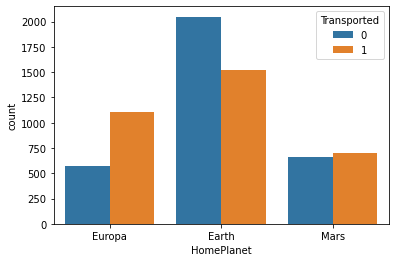

In [15]:
sns.countplot(x='HomePlanet',hue = 'Transported',data = train)
plt.savefig('pics/HomePlanet.png')

People from Europa were likely to be transported while people from Earth were not. People from Mars were in the middle

In [16]:
train.groupby('CryoSleep').describe().T

CryoSleep                      0            1
Age          count  4274.000000   2332.000000
             mean   29.813992     27.207976  
             std    14.115494     15.128254  
             min    0.000000      0.000000   
             25%    21.000000     17.000000  
             50%    28.000000     26.000000  
             75%    38.000000     36.000000  
             max    79.000000     78.000000  
VIP          count  4274.000000   2332.000000
             mean   0.033926      0.007290   
             std    0.181060      0.085087   
             min    0.000000      0.000000   
             25%    0.000000      0.000000   
             50%    0.000000      0.000000   
             75%    0.000000      0.000000   
             max    1.000000      1.000000   
RoomService  count  4274.000000   2332.000000
             mean   344.661441    0.000000   
             std    775.308258    0.000000   
             min    0.000000      0.000000   
             25%    0.000000      0.000000   
             50%    2.000000      0.000000   
             75%    381.750000    0.000000   
             max    9920.000000   0.000000   
FoodCourt    count  4274.000000   2332.000000
             mean   740.290126    0.000000   
             std    2040.077668   0.000000   
             min    0.000000      0.000000   
             25%    0.000000      0.000000   
             50%    5.000000      0.000000   
             75%    548.000000    0.000000   
             max    29813.000000  0.000000   
ShoppingMall count  4274.000000   2332.000000
             mean   275.672204    0.000000   
             std    697.563615    0.000000   
             min    0.000000      0.000000   
             25%    0.000000      0.000000   
             50%    2.000000      0.000000   
             75%    260.000000    0.000000   
             max    12253.000000  0.000000   
Spa          count  4274.000000   2332.000000
             mean   484.030182    0.000000   
             std    1392.951716   0.000000   
             min    0.000000      0.000000   
             25%    0.000000      0.000000   
             50%    7.000000      0.000000   
             75%    360.000000    0.000000   
             max    22408.000000  0.000000   
VRDeck       count  4274.000000   2332.000000
             mean   469.529949    0.000000   
             std    1373.301696   0.000000   
             min    0.000000      0.000000   
             25%    0.000000      0.000000   
             50%    4.000000      0.000000   
             75%    350.000000    0.000000   
             max    20336.000000  0.000000   
Transported  count  4274.000000   2332.000000
             mean   0.332709      0.816895   
             std    0.471239      0.386835   
             min    0.000000      0.000000   
             25%    0.000000      1.000000   
             50%    0.000000      1.000000   
             75%    1.000000      1.000000   
             max    1.000000      1.000000

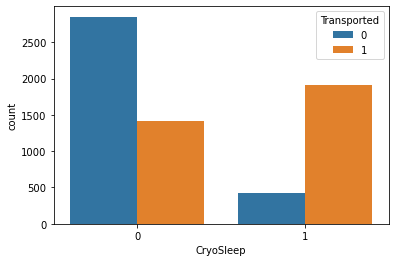

In [17]:
sns.countplot(x='CryoSleep',hue = 'Transported',data = train)
plt.savefig('pics/CryoSleep.png')

What we found earlier in the heat map that participating in CryoSleep greatly increases the chance of being transported is confirmed here

In [18]:
train['Cabin'].unique()

array(['B/0/P', 'F/0/S', 'A/0/S', ..., 'G/1499/S', 'G/1500/S', 'E/608/S'],
      dtype=object)

There are too many cabins so we won't examine them further

In [19]:
train['Destination'].unique()

array(['TRAPPIST-1e', 'PSO J318.5-22', '55 Cancri e'], dtype=object)

In [20]:
train.groupby('Destination').describe().T

Destination          55 Cancri e  PSO J318.5-22   TRAPPIST-1e
CryoSleep    count  1407.000000   623.000000     4576.000000 
             mean   0.411514      0.491172       0.316215    
             std    0.492283      0.500324       0.465049    
             min    0.000000      0.000000       0.000000    
             25%    0.000000      0.000000       0.000000    
             50%    0.000000      0.000000       0.000000    
             75%    1.000000      1.000000       1.000000    
             max    1.000000      1.000000       1.000000    
Age          count  1407.000000   623.000000     4576.000000 
             mean   29.415068     27.808989      28.881556   
             std    14.660152     13.954236      14.566237   
             min    0.000000      0.000000       0.000000    
             25%    20.000000     19.000000      19.000000   
             50%    28.000000     25.000000      27.000000   
             75%    39.000000     35.000000      38.000000   
             max    78.000000     73.000000      79.000000   
VIP          count  1407.000000   623.000000     4576.000000 
             mean   0.037669      0.024077       0.020542    
             std    0.190462      0.153412       0.141860    
             min    0.000000      0.000000       0.000000    
             25%    0.000000      0.000000       0.000000    
             50%    0.000000      0.000000       0.000000    
             75%    0.000000      0.000000       0.000000    
             max    1.000000      1.000000       1.000000    
RoomService  count  1407.000000   623.000000     4576.000000 
             mean   181.749822    99.277689      252.515516  
             std    668.507588    297.468199     669.138829  
             min    0.000000      0.000000       0.000000    
             25%    0.000000      0.000000       0.000000    
             50%    0.000000      0.000000       0.000000    
             75%    2.500000      4.000000       111.250000  
             max    9920.000000   2647.000000    8586.000000 
FoodCourt    count  1407.000000   623.000000     4576.000000 
             mean   908.425729    131.951846     394.151879  
             std    2713.993673   574.200687     1295.806328 
             min    0.000000      0.000000       0.000000    
             25%    0.000000      0.000000       0.000000    
             50%    0.000000      0.000000       0.000000    
             75%    324.500000    3.000000       69.250000   
             max    29813.000000  7069.000000    18481.000000
ShoppingMall count  1407.000000   623.000000     4576.000000 
             mean   168.144279    116.680578     189.893357  
             std    632.142863    333.506575     583.886986  
             min    0.000000      0.000000       0.000000    
             25%    0.000000      0.000000       0.000000    
             50%    0.000000      0.000000       0.000000    
             75%    1.000000      7.500000       50.000000   
             max    7810.000000   2908.000000    12253.000000
Spa          count  1407.000000   623.000000     4576.000000 
             mean   483.697228    116.757624     287.465691  
             std    1621.839537   650.721322     1004.340910 
             min    0.000000      0.000000       0.000000    
             25%    0.000000      0.000000       0.000000    
             50%    0.000000      0.000000       0.000000    
             75%    117.500000    3.000000       74.000000   
             max    22408.000000  13902.000000   18572.000000
VRDeck       count  1407.000000   623.000000     4576.000000 
             mean   500.753376    138.149278     265.765734  
             std    1571.143939   480.847993     1013.408278 
             min    0.000000      0.000000       0.000000    
             25%    0.000000      0.000000       0.000000    
             50%    0.000000      0.000000       0.000000    
             75%    123.000000    4.000000       45.000000   
             max    17306.000000

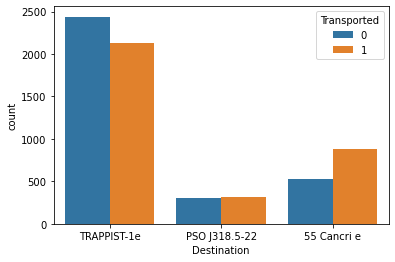

In [21]:
sns.countplot(x='Destination',hue = 'Transported',data = train)
plt.savefig('pics/Destination.png')

The destination doesn't seem to make a difference if it is to PSO J318.5-22. There is a slight chance higher of not being transported if the destination is to Trappist-1e. One has a higher chance of being transported if the destination is 55 Cancri e.

In [22]:
train.groupby('Transported')['Age'].mean()

Transported
0    30.102470
1    27.703036
Name: Age, dtype: float64

In [23]:
30.1 - 27.7

2.400000000000002

On average, people who are transported are 2.4 years younger than people who aren't. Let's do some more investigation with a violin plot.

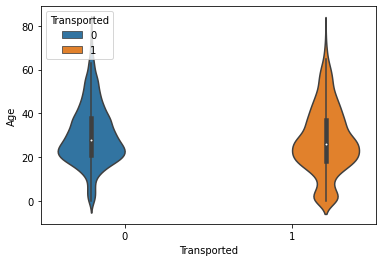

In [24]:
sns.violinplot(x='Transported', y ='Age',hue = 'Transported',data = train)
plt.savefig('pics/Age_violin.png')

The most noticiable difference in these plots is that young people are more likely too be transported

In [25]:
train.groupby('VIP').describe().T

VIP                            0             1
CryoSleep    count  6444.000000   162.000000  
             mean   0.359249      0.104938    
             std    0.479818      0.307424    
             min    0.000000      0.000000    
             25%    0.000000      0.000000    
             50%    0.000000      0.000000    
             75%    1.000000      0.000000    
             max    1.000000      1.000000    
Age          count  6444.000000   162.000000  
             mean   28.667908     37.888889   
             std    14.526674     11.701781   
             min    0.000000      18.000000   
             25%    19.000000     29.000000   
             50%    27.000000     34.000000   
             75%    38.000000     45.000000   
             max    79.000000     71.000000   
RoomService  count  6444.000000   162.000000  
             mean   220.025295    340.987654  
             std    644.694614    647.588129  
             min    0.000000      0.000000    
             25%    0.000000      0.000000    
             50%    0.000000      0.000000    
             75%    46.000000     479.250000  
             max    9920.000000   3010.000000 
FoodCourt    count  6444.000000   162.000000  
             mean   442.928305    1912.160494 
             std    1560.565680   4001.972628 
             min    0.000000      0.000000    
             25%    0.000000      0.000000    
             50%    0.000000      363.000000  
             75%    61.000000     2123.500000 
             max    27071.000000  29813.000000
ShoppingMall count  6444.000000   162.000000  
             mean   177.108318    228.006173  
             std    576.281157    577.801160  
             min    0.000000      0.000000    
             25%    0.000000      0.000000    
             50%    0.000000      0.000000    
             75%    28.000000     101.500000  
             max    12253.000000  3700.000000 
Spa          count  6444.000000   162.000000  
             mean   301.409839    780.617284  
             std    1124.687091   1687.130314 
             min    0.000000      0.000000    
             25%    0.000000      0.000000    
             50%    0.000000      54.500000   
             75%    58.000000     906.750000  
             max    22408.000000  13902.000000
VRDeck       count  6444.000000   162.000000  
             mean   280.538020    1228.296296 
             std    1064.100135   2434.105345 
             min    0.000000      0.000000    
             25%    0.000000      0.000000    
             50%    0.000000      42.000000   
             75%    43.000000     1382.750000 
             max    20336.000000  12424.000000
Transported  count  6444.000000   162.000000  
             mean   0.506983      0.370370    
             std    0.499990      0.484401    
             min    0.000000      0.000000    
             25%    0.000000      0.000000    
             50%    1.000000      0.000000    
             75%    1.000000      1.000000    
             max    1.000000      1.000000

<AxesSubplot:xlabel='VIP', ylabel='count'>

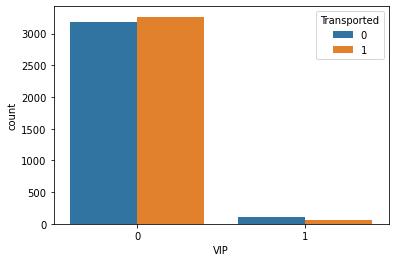

In [26]:
sns.countplot(x='VIP',hue = 'Transported',data = train)

<AxesSubplot:xlabel='Transported', ylabel='count'>

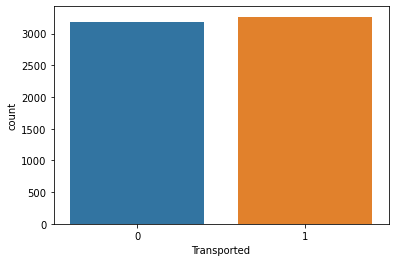

In [27]:
sns.countplot(x=train[train['VIP'] == 0]["Transported"])

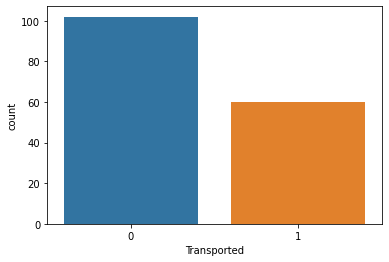

In [28]:
sns.countplot(x=train[train['VIP'] == 1]["Transported"])
plt.savefig('pics/VIP1.png')

Paying for a VIP service actually decreases ones chance of being transported

In [29]:
train.groupby('Transported')['RoomService'].mean()

Transported
0    383.642269
1    64.658852 
Name: RoomService, dtype: float64

In [30]:
383.64 - 64.66

318.98

People who get transported tend to pay $318.98 less then people who don't get transported on roomservice

In [31]:
train.groupby('Transported')['FoodCourt'].mean()

Transported
0    385.928027
1    570.646829
Name: FoodCourt, dtype: float64

In [32]:
385.93 - 570.65

-184.71999999999997

People who get transported tend to pay $184.72 more then people who don't get transported on the foodcourt

In [33]:
train.groupby('Transported')['ShoppingMall'].mean()

Transported
0    171.621836
1    184.993989
Name: ShoppingMall, dtype: float64

In [34]:
171.62 - 184.99

-13.370000000000005

People who get transported tend to pay $13.37 more then people who don't get transported on the shoppingmall

In [35]:
train.groupby('Transported')['Spa'].mean()

Transported
0    566.493443
1    63.484521 
Name: Spa, dtype: float64

In [36]:
566.49 - 63.48

503.01

People who get transported tend to pay $503.01 less then people who don't get transported on spa services

In [37]:
train.groupby('Transported')['VRDeck'].mean()

Transported
0    539.860323
1    71.105801 
Name: VRDeck, dtype: float64

In [38]:
539.86 - 71.11

468.75

People who get transported tend to pay $468.75 less then people who don't get transported on the VRDeck

### Model Setup

We need to get rid of columns that don't matter, bring in the testing data and do the same thing, and give ourselves a baseline that our model has to do better than

In [39]:
train.drop(columns=['HomePlanet', 'Cabin', 'Destination', 'Name'], inplace=True)
train.head()

,PassengerId,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,0001_01,0,39.0,0,0.0,0.0,0.0,0.0,0.0,0
1,0002_01,0,24.0,0,109.0,9.0,25.0,549.0,44.0,1
2,0003_01,0,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0
3,0003_02,0,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0
4,0004_01,0,16.0,0,303.0,70.0,151.0,565.0,2.0,1


In [40]:
test = pd.read_csv('datasets/test.csv')
test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [41]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


In [42]:
test.isna().sum()

PassengerId     0  
HomePlanet      87 
CryoSleep       93 
Cabin           100
Destination     92 
Age             91 
VIP             93 
RoomService     82 
FoodCourt       106
ShoppingMall    98 
Spa             101
VRDeck          80 
Name            94 
dtype: int64

We need all the rows to have values here. The first step is to get rid of the columns with no numerical values. Then fill out the true and false values where no input equals false. The remaining rows we just input the mean of the column

In [43]:
test.drop(columns=['HomePlanet', 'Cabin', 'Destination', 'Name'], inplace=True)
test.head()

,PassengerId,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,0013_01,True,27.0,False,0.0,0.0,0.0,0.0,0.0
1,0018_01,False,19.0,False,0.0,9.0,0.0,2823.0,0.0
2,0019_01,True,31.0,False,0.0,0.0,0.0,0.0,0.0
3,0021_01,False,38.0,False,0.0,6652.0,0.0,181.0,585.0
4,0023_01,False,20.0,False,10.0,0.0,635.0,0.0,0.0


In [44]:
test['CryoSleep'] = test['CryoSleep'].map(lambda x: 1 if x else 0)
test.head()

,PassengerId,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,0013_01,1,27.0,False,0.0,0.0,0.0,0.0,0.0
1,0018_01,0,19.0,False,0.0,9.0,0.0,2823.0,0.0
2,0019_01,1,31.0,False,0.0,0.0,0.0,0.0,0.0
3,0021_01,0,38.0,False,0.0,6652.0,0.0,181.0,585.0
4,0023_01,0,20.0,False,10.0,0.0,635.0,0.0,0.0


In [45]:
test['VIP'] = test['VIP'].map(lambda x: 1 if x else 0)
test.head()

,PassengerId,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,0013_01,1,27.0,0,0.0,0.0,0.0,0.0,0.0
1,0018_01,0,19.0,0,0.0,9.0,0.0,2823.0,0.0
2,0019_01,1,31.0,0,0.0,0.0,0.0,0.0,0.0
3,0021_01,0,38.0,0,0.0,6652.0,0.0,181.0,585.0
4,0023_01,0,20.0,0,10.0,0.0,635.0,0.0,0.0


In [46]:
test['Age'].fillna(test['Age'].mean(), inplace = True)
test['RoomService'].fillna(test['RoomService'].mean(), inplace = True)
test['FoodCourt'].fillna(test['FoodCourt'].mean(), inplace = True)
test['ShoppingMall'].fillna(test['ShoppingMall'].mean(), inplace = True)
test['Spa'].fillna(test['Spa'].mean(), inplace = True)
test['VRDeck'].fillna(test['VRDeck'].mean(), inplace = True)
test.isna().sum()

PassengerId     0
CryoSleep       0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
dtype: int64

In [47]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   CryoSleep     4277 non-null   int64  
 2   Age           4277 non-null   float64
 3   VIP           4277 non-null   int64  
 4   RoomService   4277 non-null   float64
 5   FoodCourt     4277 non-null   float64
 6   ShoppingMall  4277 non-null   float64
 7   Spa           4277 non-null   float64
 8   VRDeck        4277 non-null   float64
dtypes: float64(6), int64(2), object(1)
memory usage: 300.9+ KB


In [48]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6606 entries, 0 to 8692
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   6606 non-null   object 
 1   CryoSleep     6606 non-null   int64  
 2   Age           6606 non-null   float64
 3   VIP           6606 non-null   int64  
 4   RoomService   6606 non-null   float64
 5   FoodCourt     6606 non-null   float64
 6   ShoppingMall  6606 non-null   float64
 7   Spa           6606 non-null   float64
 8   VRDeck        6606 non-null   float64
 9   Transported   6606 non-null   int64  
dtypes: float64(6), int64(3), object(1)
memory usage: 825.7+ KB


In [49]:
#Baseline
train['Transported'].value_counts()

1    3327
0    3279
Name: Transported, dtype: int64

In [50]:
3327/(3327 + 3279)

0.5036330608537694

About 50.36% of passengers are transported. Meaning that if we guessed everyone made it, we would be correct 50.36% of the time. We need a model then that performs better than this

### Modelling and Analysis

We will use the train test split model using a logistic regression. I kept adding and subtracting parts till we get an accurate model

In [51]:
train.corr()[['Transported']].sort_values(by='Transported',ascending=False)

,Transported
Transported,1.000000
CryoSleep,0.462803
FoodCourt,0.055025
ShoppingMall,0.011602
VIP,-0.042260
Age,-0.082553
VRDeck,-0.207950
Spa,-0.219854
RoomService,-0.247291


In [52]:
X = train[['CryoSleep', 'RoomService', 'Spa', 'VRDeck', 'Age', 'FoodCourt']]
y = train['Transported']

In [53]:
poly = PolynomialFeatures(include_bias = False, degree = 2)

In [54]:
X_poly = poly.fit_transform(X)

In [55]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, random_state = 42)

In [56]:
#Logistic Regression
log_r = LogisticRegression()

In [57]:
log_r.fit(X_train, y_train)

C:\Users\matth\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [58]:
print(f'Training R2: {log_r.score(X_train, y_train)}')
print(f'Testing R2: {log_r.score(X_test, y_test)}')

Training R2: 0.7803794913201454
Testing R2: 0.7790556900726392


This is a decent model that isn't over or under fit and accounts for around 78% of the variance in the data

In [59]:
#the model's coefficients
log_r.coef_

array([[ 9.18393977e-09, -1.24950910e-06, -6.92130469e-07,
        -7.97614095e-07,  1.62854565e-07,  9.30539856e-07,
         9.18393977e-09,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  2.62113522e-07,  0.00000000e+00,
         4.37939060e-08,  2.52364393e-07,  1.78104179e-07,
        -4.09094225e-05, -4.59975390e-08, -6.25133463e-07,
         5.17632809e-07, -1.90320989e-05, -1.39082179e-07,
        -4.46156288e-07, -2.24725805e-05,  3.30706228e-08,
         5.92694223e-06,  3.11228954e-05, -2.45876277e-08]])

Now let us make our prediction

In [60]:
test_df = test[['CryoSleep', 'RoomService', 'Spa', 'VRDeck', 'Age', 'FoodCourt']]
test_poly = poly.fit_transform(test_df)
prediction = log_r.predict(test_poly)
prediction

array([1, 0, 1, ..., 1, 1, 1], dtype=int64)

In [61]:
test['Transported'] = prediction
test.head()

,PassengerId,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,0013_01,1,27.0,0,0.0,0.0,0.0,0.0,0.0,1
1,0018_01,0,19.0,0,0.0,9.0,0.0,2823.0,0.0,0
2,0019_01,1,31.0,0,0.0,0.0,0.0,0.0,0.0,1
3,0021_01,0,38.0,0,0.0,6652.0,0.0,181.0,585.0,1
4,0023_01,0,20.0,0,10.0,0.0,635.0,0.0,0.0,0


In [62]:
submission = test[['PassengerId', 'Transported']]
submission['Transported'] = submission['Transported'].map(lambda x: True if x else False)
submission.head()

C:\Users\matth\AppData\Local\Temp/ipykernel_37584/3948048389.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  submission['Transported'] = submission['Transported'].map(lambda x: True if x else False)


,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,False


In [63]:
submission.to_csv('kaggle_submission/submission.csv')